# Credit Card Fraud Detection Analysis

In [124]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set seaborn style for visualizations
sns.set_style("whitegrid")

In [126]:
# 1. Read the Dataset
# Assuming a credit card fraud dataset with columns: Time, V1-V28, Amount, Class
df = pd.read_csv('creditcard.csv')
print("Dataset loaded successfully. Shape:", df.shape)

Dataset loaded successfully. Shape: (284807, 31)


### Basic Functions

In [128]:
print("1. Shape of dataset:", df.shape)

1. Shape of dataset: (284807, 31)


In [129]:
print("2. Columns:", df.columns.tolist())

2. Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [130]:
print("3. Data types:\n", df.dtypes)


3. Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [131]:
print("4. Describe (numerical):\n", df.describe())


4. Describe (numerical):
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e

In [132]:
print("5. Info:\n", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [133]:
print("6. Head of dataset:\n", df.head())


6. Head of dataset:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

In [134]:
print("7. Tail of dataset:\n", df.tail())


7. Tail of dataset:
             Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 

In [139]:
print("8. Missing values:\n", df.isnull().sum())


8. Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [140]:
print("9. Unique values in Class:", df['Class'].unique())


9. Unique values in Class: [0 1]


In [141]:
print("10. Value counts of Class:\n", df['Class'].value_counts())


10. Value counts of Class:
 Class
0    284315
1       492
Name: count, dtype: int64


In [147]:
print("11. Correlation matrix (first 5 columns):\n", df.iloc[:, :5].corr())


11. Correlation matrix (first 5 columns):
           Time            V1            V2            V3            V4
Time  1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01
V1    0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16
V2   -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15
V3   -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16
V4   -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00


In [151]:
print("12. Mean of Amount:", df['Amount'].mean())


12. Mean of Amount: 88.34961925093133


In [152]:
print("13. Median of Amount:", df['Amount'].median())


13. Median of Amount: 22.0


In [153]:
print("14. Standard deviation of Amount:", df['Amount'].std())


14. Standard deviation of Amount: 250.1201092402221


In [154]:
print("15. Min of Time:", df['Time'].min())


15. Min of Time: 0.0


In [155]:
print("16. Max of Time:", df['Time'].max())


16. Max of Time: 172792.0


In [156]:
print("17. Sum of Amount:", df['Amount'].sum())


17. Sum of Amount: 25162590.009999998


In [157]:
print("18. Count of non-null in V1:", df['V1'].count())


18. Count of non-null in V1: 284807


In [158]:
print("19. First value in Time:", df['Time'].iloc[0])


19. First value in Time: 0.0


In [159]:
print("20. Last value in Amount:", df['Amount'].iloc[-1])


20. Last value in Amount: 217.0


### Data Cleaning

In [161]:
# Query 1: Remove rows with missing values (if any)
df_clean = df.dropna()
print("Q1. Rows after removing missing values:", df_clean.shape[0])

Q1. Rows after removing missing values: 284807


In [162]:
# Query 2: Replace negative Amount values with 0 (assuming invalid)
df_clean['Amount'] = df_clean['Amount'].apply(lambda x: 0 if x < 0 else x)
print("Q2. Negative Amounts replaced:", (df_clean['Amount'] < 0).sum())

Q2. Negative Amounts replaced: 0


In [163]:
# Query 3: Remove duplicate rows
df_clean = df_clean.drop_duplicates()
print("Q3. Rows after removing duplicates:", df_clean.shape[0])

Q3. Rows after removing duplicates: 283726


In [164]:
# Query 4: Convert Class to categorical
df_clean['Class'] = df_clean['Class'].astype('category')
print("Q4. Class data type:", df_clean['Class'].dtype)

Q4. Class data type: category


In [165]:
# Query 5: Remove outliers in Amount using IQR method
Q1 = df_clean['Amount'].quantile(0.25)
Q3 = df_clean['Amount'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[(df_clean['Amount'] >= Q1 - 1.5*IQR) & (df_clean['Amount'] <= Q3 + 1.5*IQR)]
print("Q5. Rows after removing Amount outliers:", df_clean.shape[0])

Q5. Rows after removing Amount outliers: 252041


### Data Filtering

In [167]:
# Query 1: Filter fraudulent transactions (Class == 1)
fraud = df_clean[df_clean['Class'] == 1]
print("Q1. Fraudulent transactions:", fraud.shape[0])

Q1. Fraudulent transactions: 386


In [168]:
# Query 2: Filter non-fraudulent transactions with Amount > 1000
high_amount_non_fraud = df_clean[(df_clean['Class'] == 0) & (df_clean['Amount'] > 1000)]
print("Q2. Non-fraudulent with Amount > 1000:", high_amount_non_fraud.shape[0])

Q2. Non-fraudulent with Amount > 1000: 0


In [180]:
# Query 3: Filter transactions in first 3600 seconds
early_transactions = df_clean[df_clean['Time'] <= 3600]
print("Q3. Transactions within first 3600 seconds:", early_transactions.shape[0])

Q3. Transactions within first 3600 seconds: 3632


In [181]:
# Query 4: Filter transactions with Amount between 50 and 100
mid_range = df_clean[(df_clean['Amount'] >= 50) & (df_clean['Amount'] <= 100)]
print("Q4. Transactions with Amount between 50 and 100:", mid_range.shape[0])


Q4. Transactions with Amount between 50 and 100: 38517


In [182]:
# Query 5: Filter transactions where V1 is positive
positive_v1 = df_clean[df_clean['V1'] > 0]
print("Q5. Transactions with positive V1:", positive_v1.shape[0])

Q5. Transactions with positive V1: 128116


### Grouping

In [184]:
# Query 1: Group by Class and calculate mean Amount
group_mean_amount = df_clean.groupby('Class', observed=True)['Amount'].mean()
print("Q1. Mean Amount by Class:\n", group_mean_amount)

Q1. Mean Amount by Class:
 Class
0    35.119837
1    30.467694
Name: Amount, dtype: float64


In [185]:
# Query 2: Group by Class and count transactions
group_count = df_clean.groupby('Class', observed=True).size()
print("Q2. Transaction count by Class:\n", group_count)

Q2. Transaction count by Class:
 Class
0    251655
1       386
dtype: int64


In [186]:
# Query 3: Group by Class and sum Amount
group_sum_amount = df_clean.groupby('Class', observed=True)['Amount'].sum()
print("Q3. Total Amount by Class:\n", group_sum_amount)

Q3. Total Amount by Class:
 Class
0    8838082.66
1      11760.53
Name: Amount, dtype: float64


In [187]:
# Query 4: Group by Class and get max Time
group_max_time = df_clean.groupby('Class', observed=True)['Time'].max()
print("Q4. Max Time by Class:\n", group_max_time)

Q4. Max Time by Class:
 Class
0    172788.0
1    170348.0
Name: Time, dtype: float64


In [188]:
# Query 5: Group by Class and calculate median V1
group_median_v1 = df_clean.groupby('Class', observed=True)['V1'].median()
print("Q5. Median V1 by Class:\n", group_median_v1)

Q5. Median V1 by Class:
 Class
0    0.038989
1   -2.194574
Name: V1, dtype: float64


### Sorting

In [190]:
# Query 1: Sort by Amount in descending order
sort_amount_desc = df_clean.sort_values(by='Amount', ascending=False).head()
print("Q1. Top 5 by Amount (desc):\n", sort_amount_desc[['Time', 'Amount', 'Class']])

Q1. Top 5 by Amount (desc):
             Time  Amount Class
236238  148725.0  185.37     0
205222  135641.0  185.36     0
254871  156952.0  185.36     0
112896   72846.0  185.35     0
140097   83536.0  185.34     0


In [191]:
# Query 2: Sort by Time in ascending order
sort_time_asc = df_clean.sort_values(by='Time', ascending=True).head()
print("Q2. First 5 by Time (asc):\n", sort_time_asc[['Time', 'Amount', 'Class']])

Q2. First 5 by Time (asc):
    Time  Amount Class
0   0.0  149.62     0
1   0.0    2.69     0
3   1.0  123.50     0
4   2.0   69.99     0
5   2.0    3.67     0


In [192]:
# Query 3: Sort by V1 in descending order
sort_v1_desc = df_clean.sort_values(by='V1', ascending=False).head()
print("Q3. Top 5 by V1 (desc):\n", sort_v1_desc[['V1', 'Amount', 'Class']])

Q3. Top 5 by V1 (desc):
               V1  Amount Class
193547  2.454930     8.0     0
230533  2.451888     7.0     0
251611  2.446505     7.0     0
155329  2.439207    30.0     0
167928  2.430507     7.0     0


In [193]:
# Query 4: Sort by Amount and Class
sort_amount_class = df_clean.sort_values(by=['Amount', 'Class'], ascending=[False, True]).head()
print("Q4. Top 5 by Amount and Class:\n", sort_amount_class[['Amount', 'Class']])

Q4. Top 5 by Amount and Class:
         Amount Class
236238  185.37     0
205222  185.36     0
254871  185.36     0
112896  185.35     0
140097  185.34     0


In [194]:
# Query 5: Sort by Time in descending order
sort_time_desc = df_clean.sort_values(by='Time', ascending=False).head()
print("Q5. Last 5 by Time (desc):\n", sort_time_desc[['Time', 'Amount', 'Class']])


Q5. Last 5 by Time (desc):
             Time  Amount Class
284805  172788.0   10.00     0
284804  172788.0   67.88     0
284803  172787.0   24.79     0
284802  172786.0    0.77     0
284801  172785.0    2.69     0


### Aggregations

In [196]:
agg_amount = {
    'Min': df_clean['Amount'].min(),
    'Max': df_clean['Amount'].max(),
    'Mean': df_clean['Amount'].mean(),
    'Mode': df_clean['Amount'].mode()[0],
    'Variance': df_clean['Amount'].var()
}
print("Q1. Amount Aggregations:", agg_amount)

Q1. Amount Aggregations: {'Min': 0.0, 'Max': 185.37, 'Mean': 35.112712574541455, 'Mode': 1.0, 'Variance': 1793.7535839213376}


### Data Visualization

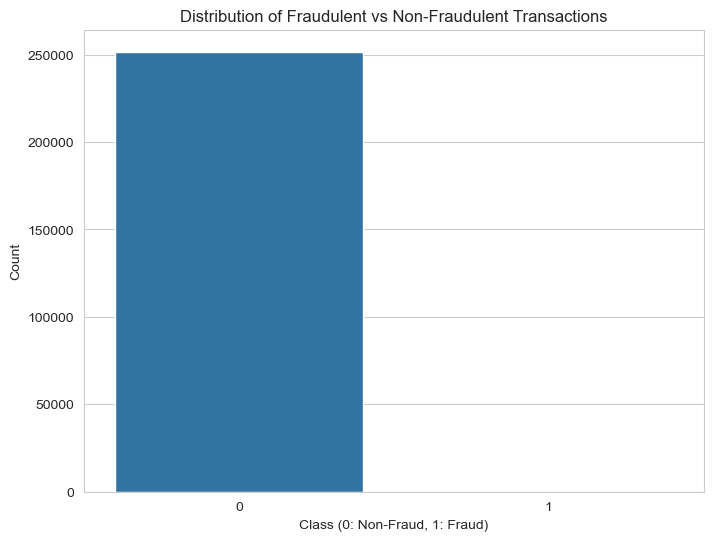

In [198]:
# Plot 1: Bar plot of Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_clean)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

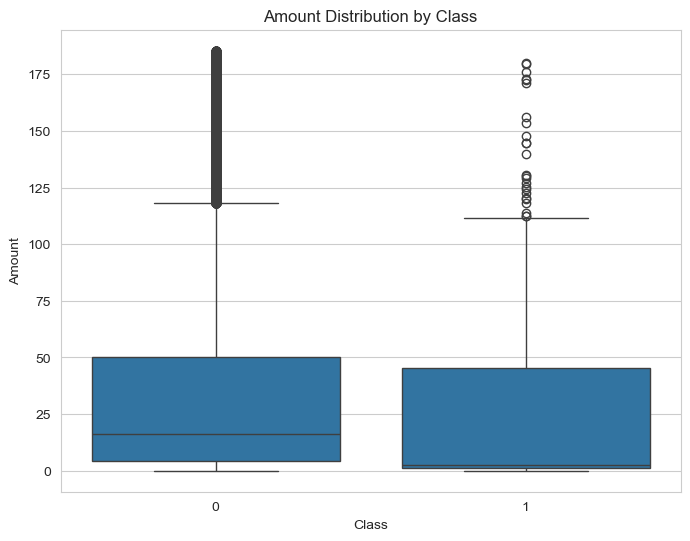

In [199]:
# Plot 2: Box plot of Amount by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df_clean)
plt.title('Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

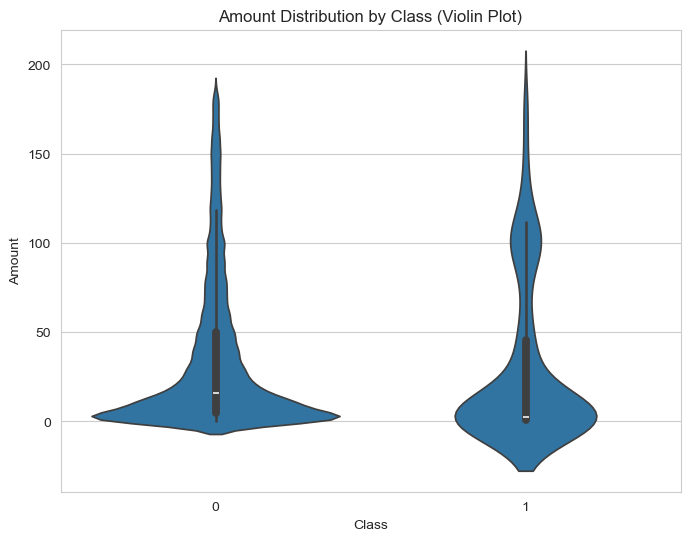

In [200]:
# Plot 3: Violin plot of Amount by Class
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Amount', data=df_clean)
plt.title('Amount Distribution by Class (Violin Plot)')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

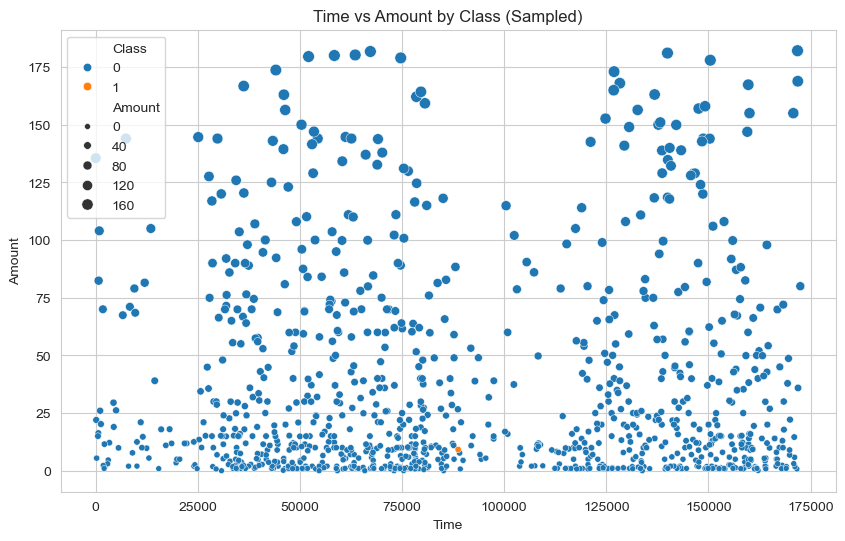

In [201]:
# Plot 4: Scatter plot of Time vs Amount colored by Class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', size='Amount', data=df_clean.sample(1000))
plt.title('Time vs Amount by Class (Sampled)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

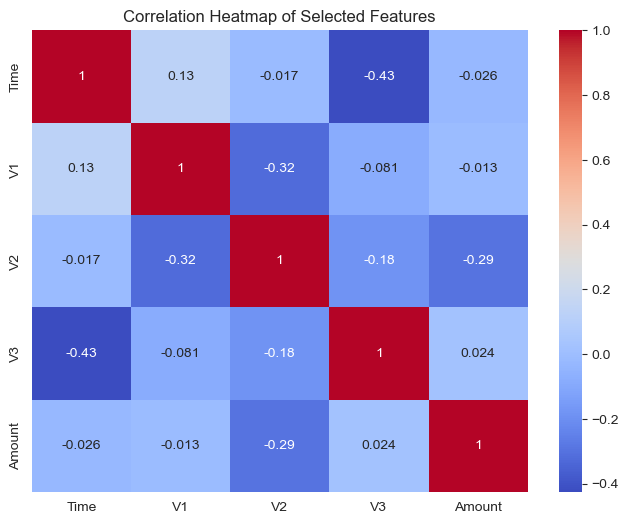

In [202]:
# Plot 5: Heatmap of correlations (first 5 features)
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['Time', 'V1', 'V2', 'V3', 'Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

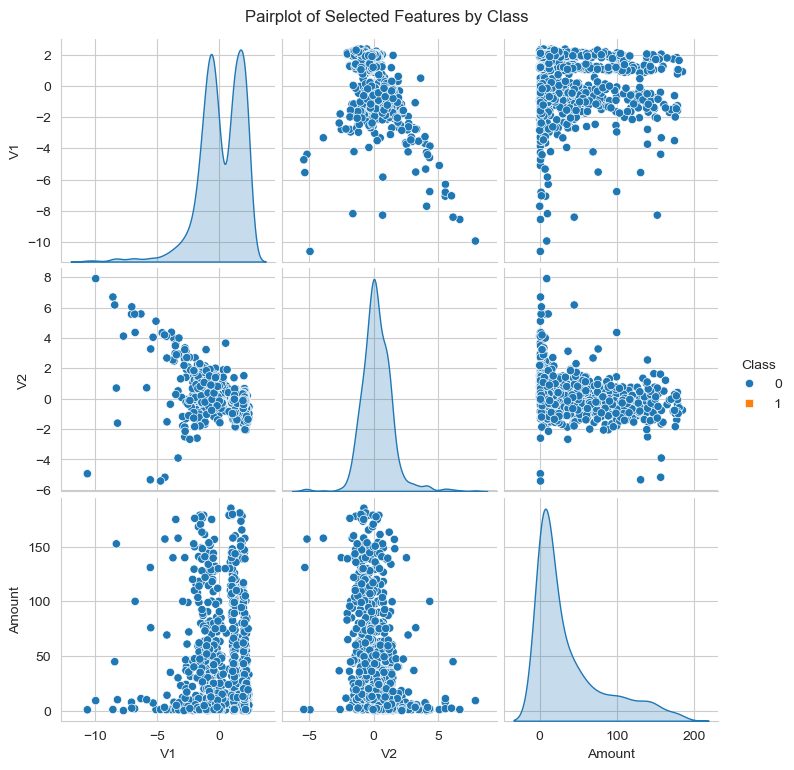

In [203]:
# Plot 6: Pairplot of selected features
sns.pairplot(df_clean[['V1', 'V2', 'Amount', 'Class']].sample(1000), hue='Class', markers=['o', 's'])
plt.suptitle('Pairplot of Selected Features by Class', y=1.02)
plt.show()